### Naive Bayes Algorithm

**JIFRY ISSADEEN** <br>
https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

**METHODOLOGY**

* The dataset was extracted from Kaggle Dataset Repository
* The dataset has 5001 instances and with the following 8 features:


| Name                         | Type
|-------------------- ---------|-------------
| long_hair                    | Categorical
| forehead_width_cm            | Numeric 
| forehead_height_cm           | Numeric
| nose_wide                    | Categorical
| nose_long	                   | Categorical
| lips_thin                    | Categorical
| distance_nose_to_lip_long    | Categorical
| gender                       | Categorical

In [1]:
# Load libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [2]:
#Open/Read Dataset

data = pd.read_csv('gender_classification_v7.csv')

# Printing the dataset shape
print ("Dataset Length: ", len(data))
print ("\nDataset Shape: ", data.shape)

Dataset Length:  5001

Dataset Shape:  (5001, 8)


In [3]:
#Display first 5 values

data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#Summary of Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [6]:
#Check for missing values

data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
#Splitting feature and target variables

feature = data.drop(['gender'], axis = 1)

target = data['gender']

In [8]:
#Display first 5 values from the feature variables

feature.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [9]:
#Display first 5 values from the target variable

target.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [10]:
#Splitting the data into training and testing sets

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.30, random_state = 0)

In [11]:
#Test Size and Training set Info

print("SUMMARY OF SPLITTED TRAINING AND TEST SETS\n")

print('--Number of Training Set:',len(feature_train))

print('--Training Size:', len(feature_train)/len(data) * 100, '%')

print('\n--Number of Test Set:',len(feature_test))

print('--Test Size:', len(feature_test)/len(data) * 100, '%')

SUMMARY OF SPLITTED TRAINING AND TEST SETS

--Number of Training Set: 3500
--Training Size: 69.98600279944012 %

--Number of Test Set: 1501
--Test Size: 30.01399720055989 %


In [12]:
feature_train.shape, feature_test.shape

((3500, 7), (1501, 7))

In [13]:
#Feature Engineering

feature_train.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
dtype: object

In [14]:
feature_train.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4160,1,12.3,5.8,0,1,1,0
1073,1,14.7,6.3,1,1,1,0
3583,1,13.1,6.1,1,0,1,1
1357,1,15.2,5.9,0,1,1,1
4645,0,15.4,5.7,1,1,1,1


In [15]:
feature_test.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2373,1,12.4,5.1,0,0,0,0
2755,1,12.4,5.7,1,1,1,1
2265,1,13.4,5.5,0,1,1,1
3901,1,12.0,6.1,0,0,0,0
3175,1,12.5,5.7,0,0,0,0


**Using Bernoulli Naive Bayes Classifier**

In [16]:
#Creating Naive Bayes Classifier Object using BernoulliNB()
bnb = BernoulliNB()

#Fitting the Model
bnb.fit(feature_train, target_train)

BernoulliNB()

In [17]:
#Predicting using test set

target_pred = bnb.predict(feature_test)

target_pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [18]:
#Predicting using train set

target_pred_train = bnb.predict(feature_train)

target_pred_train

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype='<U6')

In [19]:
#Checking accuracy of Training Set and Testing Set to check for Overfitting/Underfitting

print('Model Accuracy for Testing Set: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))

print('\nModel Accuracy for Training Set: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train)))

Model Accuracy for Testing Set: 0.9580

Model Accuracy for Training Set: 0.9611


In [20]:
#Comparing Null Accuracy and Model Accuracy

target_test.describe()

count       1501
unique         2
top       Female
freq         764
Name: gender, dtype: object

In [21]:
#Comparing Null Accuracy and Model Accuracy

null_acc = target_test.describe()[3] / target_test.describe()[0]

print('Model Accuracy: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))

print('\nNull Accuracy: {0:0.4f}'. format(null_acc))

Model Accuracy: 0.9580

Null Accuracy: 0.5090


In [22]:
#Confusion Matrix

cm = confusion_matrix(target_pred, target_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[718  17]
 [ 46 720]]

True Positives(TP) =  718

True Negatives(TN) =  720

False Positives(FP) =  17

False Negatives(FN) =  46


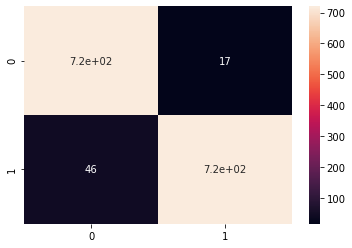

In [25]:
#Visualization of Confusion Matrix

sns.heatmap(cm, annot = True)
plt.savefig('confusion.png')

In [26]:
#Evaluation Metrics Report

print(classification_report(target_test, target_pred, zero_division = 0))

              precision    recall  f1-score   support

      Female       0.98      0.94      0.96       764
        Male       0.94      0.98      0.96       737

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



____________________________________________
**Using Gaussian Naive Bayes Classifier**

In [27]:
#Splitting feature and target variables

feature1 = data.drop(['gender'], axis = 1)

target1 = data['gender']

#Splitting the data into training and testing sets

feature_train1, feature_test1, target_train1, target_test1 = train_test_split(feature1, target1, test_size = 0.30, random_state = 0)

In [28]:
#Test Size and Training set Info

print("SUMMARY OF SPLITTED TRAINING AND TEST SETS\n")

print('--Number of Training Set:',len(feature_train1))

print('--Training Size:', len(feature_train1)/len(data) * 100, '%')

print('\n--Number of Test Set:',len(feature_test1))

print('--Test Size:', len(feature_test1)/len(data) * 100, '%')

SUMMARY OF SPLITTED TRAINING AND TEST SETS

--Number of Training Set: 3500
--Training Size: 69.98600279944012 %

--Number of Test Set: 1501
--Test Size: 30.01399720055989 %


In [29]:
#Creating Naive Bayes Classifier Object using GaussianNB()
gnb = GaussianNB()

#Fitting the Model
gnb.fit(feature_train1, target_train1)

GaussianNB()

In [30]:
#Predicting using test set

target_pred1 = gnb.predict(feature_test1)

target_pred1

array(['Female', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [31]:
#Predicting using train set

target_pred_train1 = bnb.predict(feature_train1)

target_pred_train1

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype='<U6')

In [32]:
#Checking accuracy of Training Set and Testing Set to check for Overfitting/Underfitting

print('Model Accuracy for Testing Set: {0:0.4f}'. format(accuracy_score(target_test1, target_pred1)))

print('\nModel Accuracy for Training Set: {0:0.4f}'. format(accuracy_score(target_train1, target_pred_train1)))

Model Accuracy for Testing Set: 0.9707

Model Accuracy for Training Set: 0.9611


In [33]:
#Comparing Null Accuracy and Model Accuracy

target_test1.describe()

count       1501
unique         2
top       Female
freq         764
Name: gender, dtype: object

In [34]:
#Comparing Null Accuracy and Model Accuracy

null_acc1 = target_test1.describe()[3] / target_test1.describe()[0]

print('Model Accuracy: {0:0.4f}'. format(accuracy_score(target_test1, target_pred1)))

print('\nNull Accuracy: {0:0.4f}'. format(null_acc1))

Model Accuracy: 0.9707

Null Accuracy: 0.5090


In [35]:
#Confusion Matrix

cm1 = confusion_matrix(target_pred1, target_test1)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[746  26]
 [ 18 711]]

True Positives(TP) =  746

True Negatives(TN) =  711

False Positives(FP) =  26

False Negatives(FN) =  18


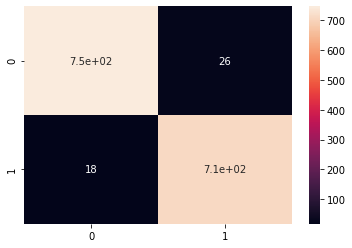

In [36]:
#Visualization of Confusion Matrix

sns.heatmap(cm1, annot = True)
plt.savefig('confusion1.png')

____________________________________________
**Using Multinomial Naive Bayes Classifier**

In [37]:
#Splitting feature and target variables

feature2 = data.drop(['gender'], axis = 1)

target2 = data['gender']

#Splitting the data into training and testing sets

feature_train2, feature_test2, target_train2, target_test2 = train_test_split(feature2, target2, test_size = 0.30, random_state = 0)

In [38]:
#Test Size and Training set Info

print("SUMMARY OF SPLITTED TRAINING AND TEST SETS\n")

print('--Number of Training Set:',len(feature_train2))

print('--Training Size:', len(feature_train2)/len(data) * 100, '%')

print('\n--Number of Test Set:',len(feature_test2))

print('--Test Size:', len(feature_test2)/len(data) * 100, '%')

SUMMARY OF SPLITTED TRAINING AND TEST SETS

--Number of Training Set: 3500
--Training Size: 69.98600279944012 %

--Number of Test Set: 1501
--Test Size: 30.01399720055989 %


In [39]:
#Creating Naive Bayes Classifier Object using MultinomialNB()
mnb = MultinomialNB()

#Fitting the Model
mnb.fit(feature_train2, target_train2)

MultinomialNB()

In [40]:
#Predicting using test set

target_pred2 = mnb.predict(feature_test2)

target_pred2

array(['Female', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [41]:
#Predicting using train set

target_pred_train2 = mnb.predict(feature_train2)

target_pred_train2

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype='<U6')

In [42]:
#Checking accuracy of Training Set and Testing Set to check for Overfitting/Underfitting

print('Model Accuracy for Testing Set: {0:0.4f}'. format(accuracy_score(target_test2, target_pred2)))

print('\nModel Accuracy for Training Set: {0:0.4f}'. format(accuracy_score(target_train2, target_pred_train2)))

Model Accuracy for Testing Set: 0.9600

Model Accuracy for Training Set: 0.9569


In [43]:
#Comparing Null Accuracy and Model Accuracy

target_test2.describe()

count       1501
unique         2
top       Female
freq         764
Name: gender, dtype: object

In [44]:
#Comparing Null Accuracy and Model Accuracy

null_acc2 = target_test2.describe()[3] / target_test2.describe()[0]

print('Model Accuracy: {0:0.4f}'. format(accuracy_score(target_test2, target_pred2)))

print('\nNull Accuracy: {0:0.4f}'. format(null_acc2))

Model Accuracy: 0.9600

Null Accuracy: 0.5090


In [45]:
#Confusion Matrix

cm2 = confusion_matrix(target_pred2, target_test2)

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[709   5]
 [ 55 732]]

True Positives(TP) =  709

True Negatives(TN) =  732

False Positives(FP) =  5

False Negatives(FN) =  55


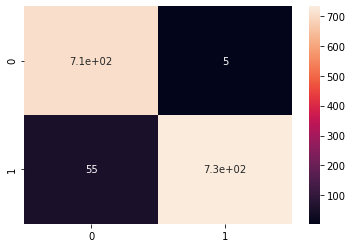

In [46]:
#Visualization of Confusion Matrix

sns.heatmap(cm2, annot = True)
plt.savefig('confusion2.png')